# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3.  Exploratory Data Analysis (EDA</a>


<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---
`Add explanation for inclusion of each package and description of its function`

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries for data preparation and model building
import scipy as sp
import statsmodels as sm
import sklearn.model_selection as skl


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3.  Exploratory data analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
 ⚡ Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

`Add description of findings in a markdown cell.`


In [3]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df.shape

(8763, 49)

In [5]:
# Checks for total nulls in the dataframe
df.isnull().sum().sum()

2068

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
#  Checks for total per column
def check_nulls (data):
    null_dict = {}

    for col in df.columns:

        if df[col].size > df[col].count():
            nulls = df[col].size - df[col].count()
            percent_missing = round(nulls / df[col].size * 100)
            null_dict[col] = f'has {nulls} nulls making up {percent_missing}% missing values'
    return null_dict

In [8]:
check_nulls(df)

{'Valencia_pressure': 'has 2068 nulls making up 24% missing values'}

In [9]:
# Dropping the column "Unnamed: 0" because it is a repeat of the row index. 
df = df.drop("Unnamed: 0", axis =1)

In [10]:
# 1. Order the columns in alphabetical order
df = df.reindex(sorted(df.columns), axis=1)

# 2. Keep the "time" column in the first index position
df = df[['time'] + [col for col in df.columns if col != 'time']]

# 3. Keep the "load_shortfall_3h" column last
df = df[[col for col in df.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h']]

# 4. Convert all column titles to lowercase
df.columns = df.columns.str.lower()

df.head()

,time,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,...,seville_wind_speed,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_deg,valencia_wind_speed,load_shortfall_3h
0,2015-01-01 03:00:00,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,...,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,level_5,0.666667,6715.666667
1,2015-01-01 06:00:00,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,...,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,level_10,1.666667,4171.666667
2,2015-01-01 09:00:00,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,...,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,level_9,1.000000,4274.666667
3,2015-01-01 12:00:00,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,...,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,level_8,1.000000,5075.666667
4,2015-01-01 15:00:00,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,...,3.000000,58.333333,NaN,0.0,283.015115,283.015115,283.015115,level_7,1.000000,6620.666667


<a id="four"></a>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
 ⚡ Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

`Add description of findings in a markdown cell.`

In [11]:
target_variable = 'load_shortfall_3h'

In [12]:
# outputs dataframe of catagorical data
def categorical(df):
    non_numeric = []
    for col in df.columns:
        if df[col].dtype == object:
          non_numeric.append(col)
    return df[non_numeric]

categorical_df = categorical(df)
categorical_df.head()

,time,seville_pressure,valencia_wind_deg
0,2015-01-01 03:00:00,sp25,level_5
1,2015-01-01 06:00:00,sp25,level_10
2,2015-01-01 09:00:00,sp25,level_9
3,2015-01-01 12:00:00,sp25,level_8
4,2015-01-01 15:00:00,sp25,level_7


In [13]:
categorical_df.shape

(8763, 3)

In [14]:
def numeric(df):
    non_numeric = []
    for col in df.columns:
        if df[col].dtype != object:
          non_numeric.append(col)
    return df[non_numeric]

numeric_df = numeric(df)
numeric_df.head()

,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,bilbao_clouds_all,...,seville_weather_id,seville_wind_speed,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_speed,load_shortfall_3h
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,0.0,...,800.0,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,0.666667,6715.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,0.0,...,800.0,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,1.666667,4171.666667
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,0.0,...,800.0,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,1.000000,4274.666667
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,0.0,...,800.0,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,1.000000,5075.666667
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,2.0,...,800.0,3.000000,58.333333,NaN,0.0,283.015115,283.015115,283.015115,1.000000,6620.666667


In [15]:
numeric_df.shape

(8763, 45)

In [16]:
kurtosis_values = df.kurtosis(numeric_only=True)
outlier_columns = kurtosis_values[kurtosis_values > 3].index
outlier_columns

# columns with potential outliers 
# to be normalisation later on

Index(['barcelona_pressure', 'barcelona_rain_1h', 'barcelona_rain_3h',
       'barcelona_weather_id', 'bilbao_rain_1h', 'bilbao_snow_3h',
       'bilbao_wind_speed', 'madrid_rain_1h', 'madrid_weather_id',
       'seville_rain_1h', 'seville_rain_3h', 'seville_weather_id',
       'valencia_snow_3h', 'valencia_wind_speed'],
      dtype='object')

In [17]:
# list of unique city names 
unique_cities = []
for col in df.drop(['time', 'load_shortfall_3h'], axis=1).columns:
    city = col.split('_')[0]
    if city not in unique_cities:
        unique_cities.append(city)

unique_cities

['barcelona', 'bilbao', 'madrid', 'seville', 'valencia']

In [18]:
# returns a dataframe with weather data for each ciy
def city_df (df, city_name):

    cities = {}

    for col in df.columns:
        city = col.split('_')[0]

        if city not in cities:
            cities[city] = []

            for col in df.columns:
                if city in col:
                    cities[city].append(col)
    
    
    return df[cities[city_name]]

In [19]:
# description of the barcelona weather values
barcelona_df = city_df(df, unique_cities[0])
barcelona_df.describe()

,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed
count,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,1.377965e+03,0.128906,0.000439,289.855459,291.157644,288.447422,765.979687,190.544848,2.870497
std,1.407314e+04,0.634730,0.003994,6.528111,7.273538,6.102593,88.142235,89.077337,1.792197
min,6.706667e+02,0.000000,0.000000,270.816667,272.150000,269.483333,200.666667,0.000000,0.000000
25%,1.014000e+03,0.000000,0.000000,284.973443,285.483333,284.150000,800.000000,118.166667,1.666667
50%,1.018000e+03,0.000000,0.000000,289.416667,290.150000,288.150000,800.333333,200.000000,2.666667
75%,1.022000e+03,0.000000,0.000000,294.909000,296.855000,292.966667,801.000000,260.000000,4.000000
max,1.001411e+06,12.000000,0.093000,307.316667,314.076667,304.816667,804.000000,360.000000,12.666667


In [20]:
# description of the barcelona weather values
bilbao_df = city_df(df, unique_cities[1])
bilbao_df.describe()

,bilbao_clouds_all,bilbao_pressure,bilbao_rain_1h,bilbao_snow_3h,bilbao_temp,bilbao_temp_max,bilbao_temp_min,bilbao_weather_id,bilbao_wind_deg,bilbao_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,43.469132,1017.739549,0.135753,0.031912,286.422929,287.966027,285.017973,724.722362,158.957511,1.850356
std,32.551044,10.046124,0.374901,0.557264,6.818682,7.105590,6.705672,115.846537,102.056299,1.695888
min,0.000000,971.333333,0.000000,0.000000,267.483333,269.063000,264.483333,207.333333,0.000000,0.000000
25%,10.000000,1013.000000,0.000000,0.000000,281.374167,282.836776,280.085167,700.333333,73.333333,0.666667
50%,45.000000,1019.000000,0.000000,0.000000,286.158333,287.630000,284.816667,800.000000,147.000000,1.000000
75%,75.000000,1024.000000,0.100000,0.000000,291.034167,292.483333,289.816667,801.666667,234.000000,2.666667
max,100.000000,1042.000000,3.000000,21.300000,310.710000,317.966667,309.816667,804.000000,359.333333,12.666667


In [21]:
# description of the madrid weather values
madrid_df = city_df(df, unique_cities[2])
madrid_df.describe()

,madrid_clouds_all,madrid_humidity,madrid_pressure,madrid_rain_1h,madrid_temp,madrid_temp_max,madrid_temp_min,madrid_weather_id,madrid_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,19.473392,57.414717,1010.316920,0.037818,288.419439,289.540309,287.202203,773.527594,2.425729
std,28.053660,24.335396,22.198555,0.152639,9.346796,9.752047,9.206237,77.313315,1.850371
min,0.000000,6.333333,927.666667,0.000000,264.983333,264.983333,264.983333,211.000000,0.000000
25%,0.000000,36.333333,1012.333333,0.000000,281.404281,282.150000,280.299167,800.000000,1.000000
50%,0.000000,58.000000,1017.333333,0.000000,287.053333,288.116177,286.083333,800.000000,2.000000
75%,33.333333,78.666667,1022.000000,0.000000,295.154667,296.816667,293.884500,800.666667,3.333333
max,100.000000,100.000000,1038.000000,3.000000,313.133333,314.483333,310.383333,804.000000,13.000000


In [22]:
# description of the seville weather values
seville_df = city_df(df, unique_cities[3])
seville_df.describe()

,seville_clouds_all,seville_humidity,seville_rain_1h,seville_rain_3h,seville_temp,seville_temp_max,seville_temp_min,seville_weather_id,seville_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,13.714748,62.658793,0.039439,0.000243,293.978903,297.479527,291.633356,774.658818,2.425045
std,24.272482,22.621226,0.175857,0.003660,7.920986,8.875812,8.178220,71.940009,1.672895
min,0.000000,8.333333,0.000000,0.000000,272.063000,272.063000,270.150000,200.000000,0.000000
25%,0.000000,44.333333,0.000000,0.000000,288.282917,291.312750,285.816667,800.000000,1.000000
50%,0.000000,65.666667,0.000000,0.000000,293.323333,297.101667,290.816667,800.000000,2.000000
75%,20.000000,82.000000,0.000000,0.000000,299.620333,304.150000,297.150000,800.000000,3.333333
max,97.333333,100.000000,3.000000,0.093333,314.976667,320.483333,314.816667,804.000000,11.666667


In [23]:
# description of the seville weather values
valencia_df = city_df(df, unique_cities[4])
valencia_df.describe()

,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_speed
count,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,65.247727,1012.051407,0.000205,290.592152,291.337233,289.867648,2.586272
std,19.262322,9.506214,0.011866,7.162274,7.565692,6.907402,2.411190
min,10.333333,972.666667,0.000000,269.888000,269.888000,269.888000,0.000000
25%,51.333333,1010.333333,0.000000,285.150000,285.550167,284.783333,1.000000
50%,67.000000,1015.000000,0.000000,290.176667,291.037000,289.550000,1.666667
75%,81.333333,1018.000000,0.000000,296.056667,297.248333,294.820000,3.666667
max,100.000000,1021.666667,0.791667,310.426667,314.263333,310.272000,52.000000


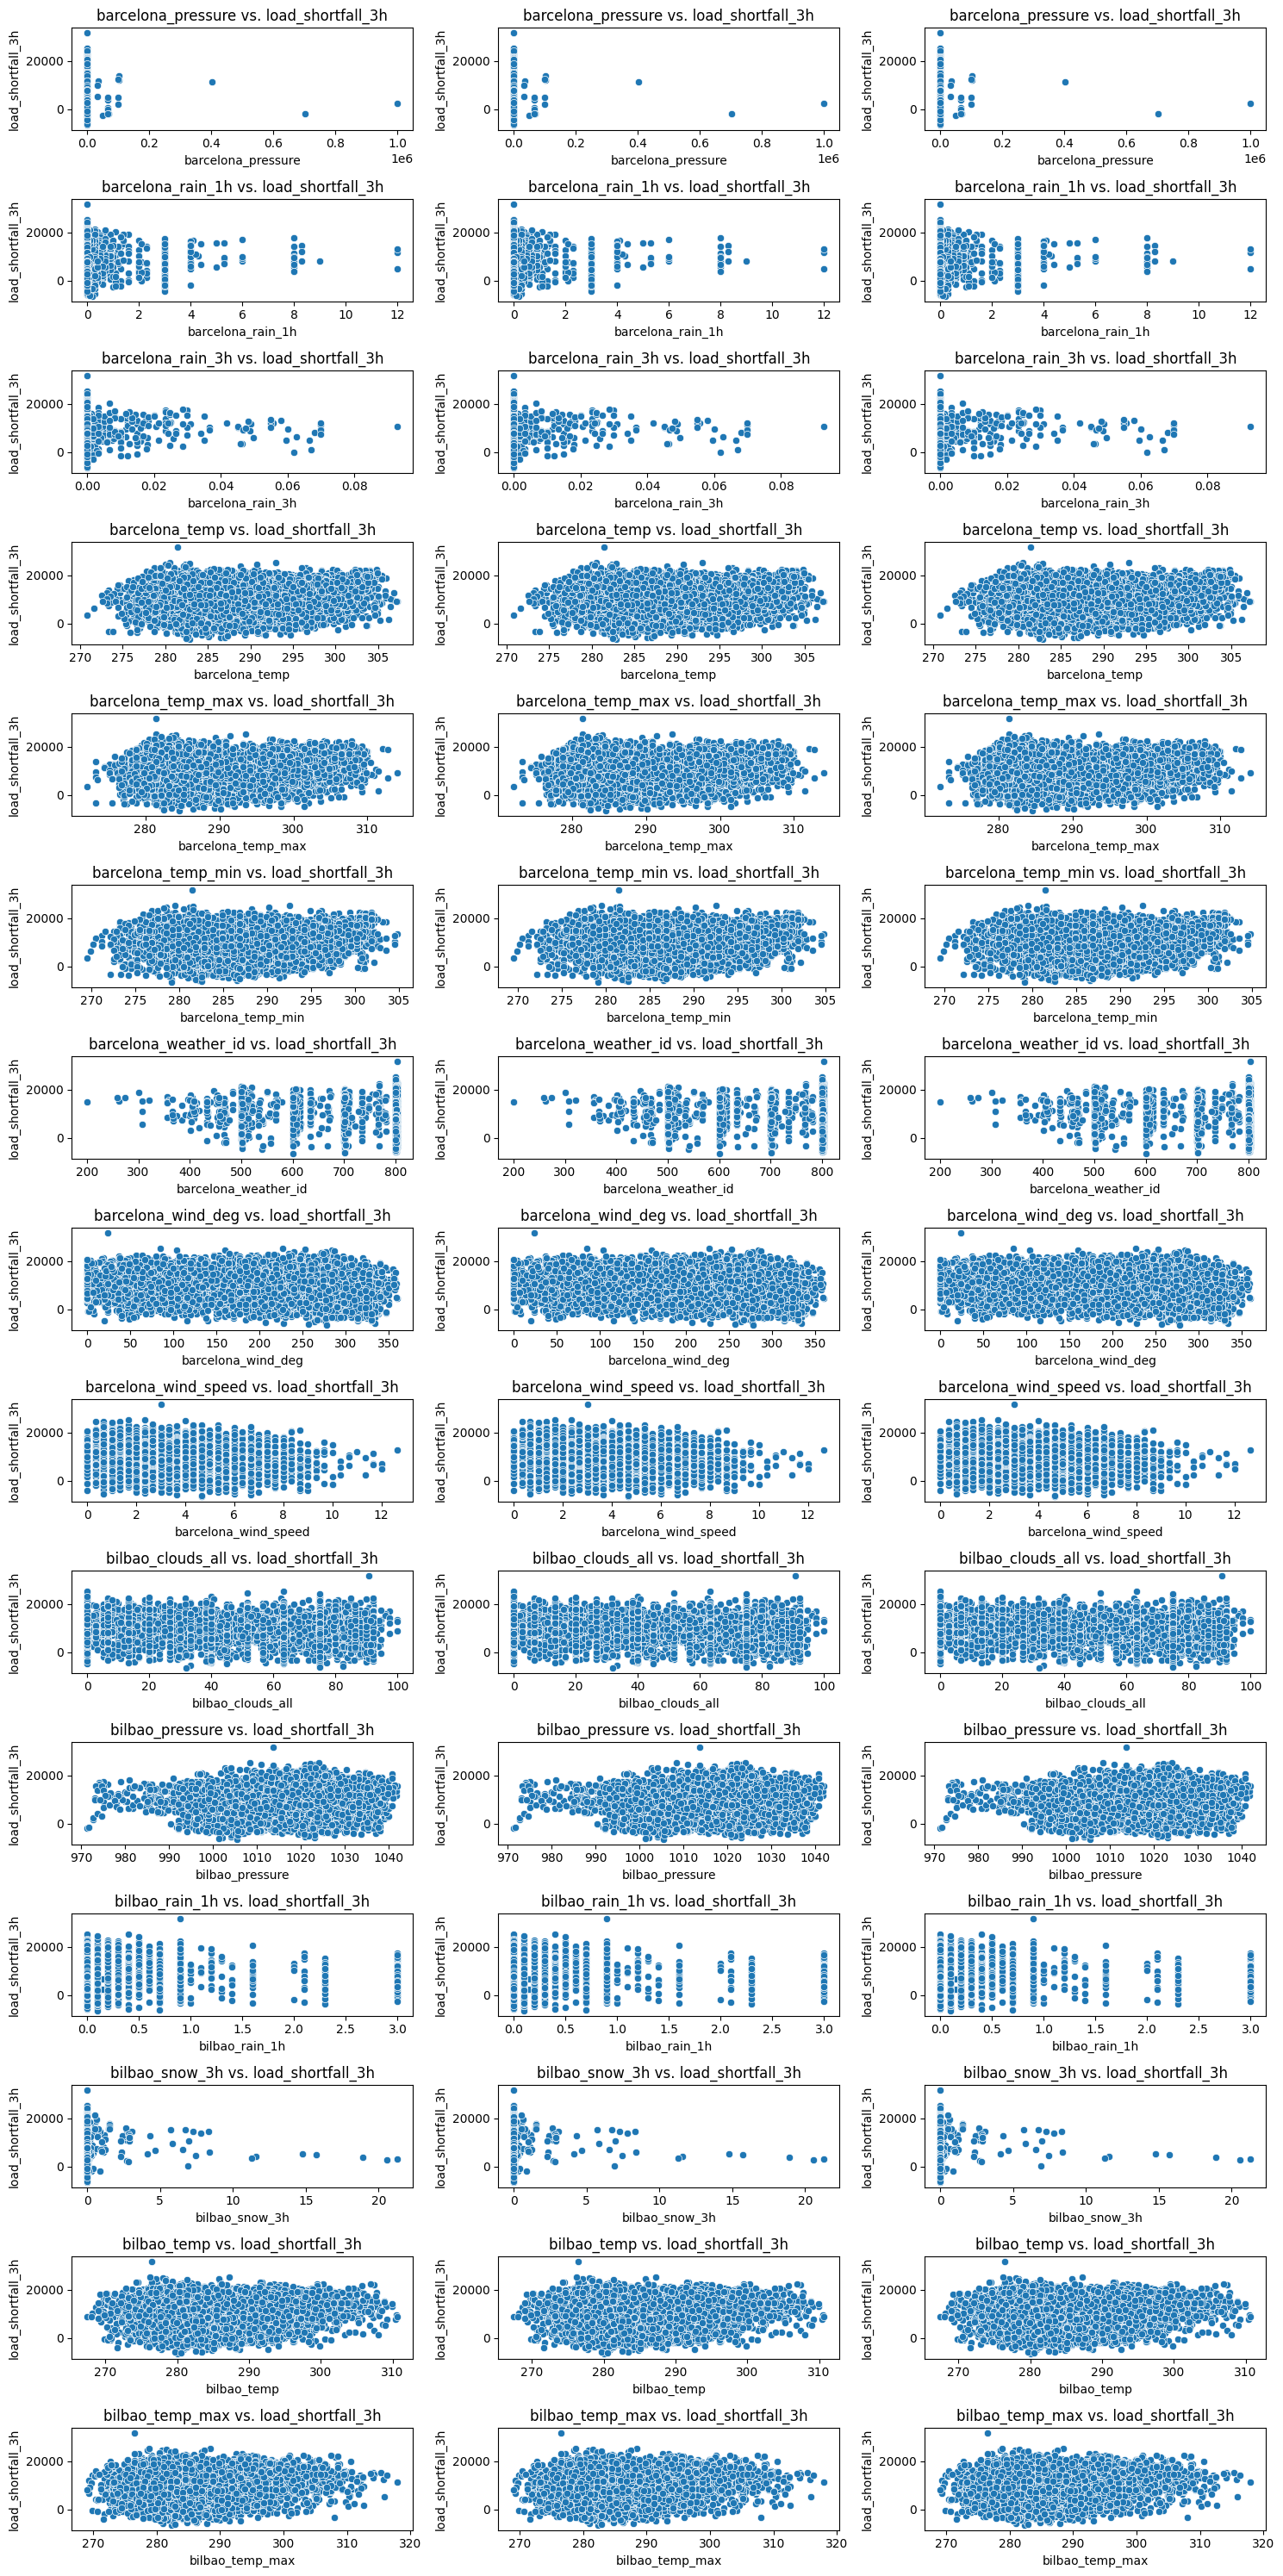

In [24]:
# plot relevant feature interactions
index = 0
fig, axs = plt.subplots(15, 3, figsize=(15, 30))
for i in range(15):
    for j in range(3):
        var = numeric_df.columns[index]
        sns.scatterplot(data=numeric_df, x=var, y=target_variable, ax=axs[i,j])
        axs[i,j].set_title(f'{var} vs. {target_variable}')
    index += 1    
fig.tight_layout()
plt.show()

In [25]:
categorical_df.shape

(8763, 3)

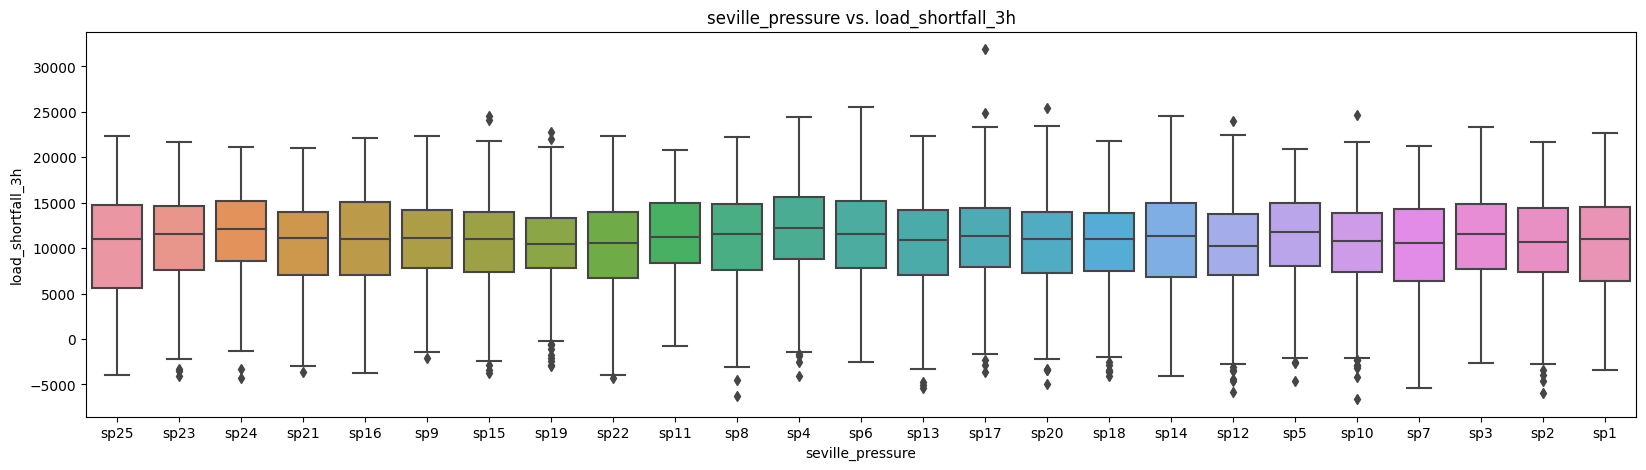

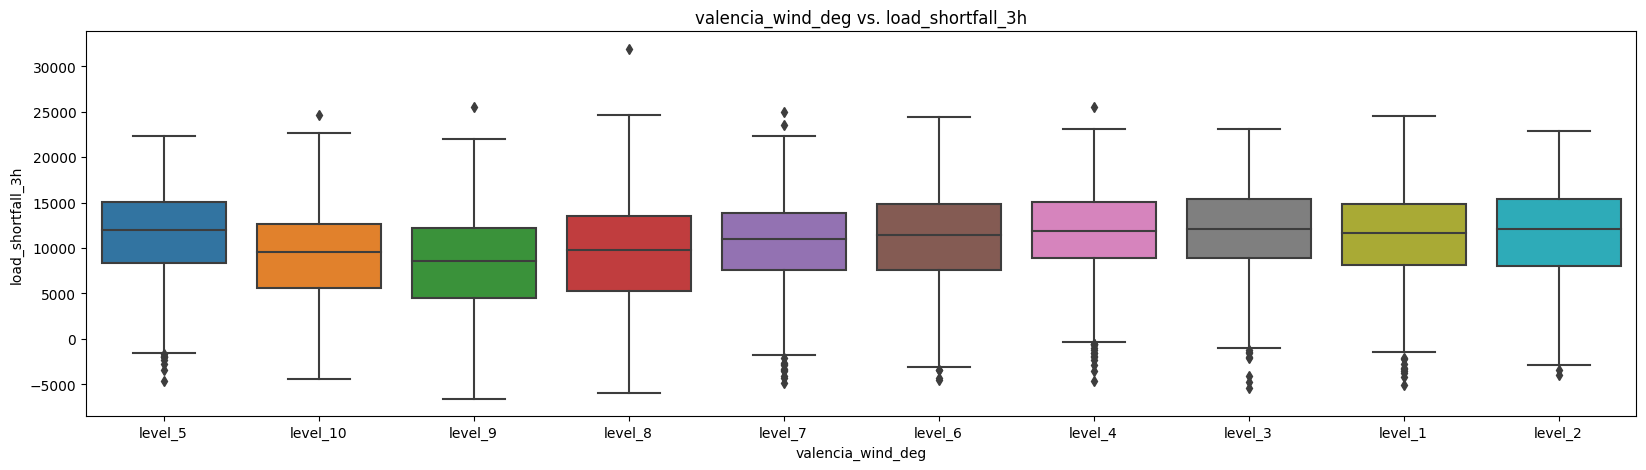

In [26]:
for var in categorical_df.drop("time", axis=1).columns:
     plt.figure(figsize =(20,5))
     sns.boxplot(x=var, y=target_variable, data = df)
     plt.title(f'{var} vs. {target_variable}')
     plt.show()

In [27]:
# evaluate correlation
df.corr("kendall", min_periods= 1, numeric_only= True)

,barcelona_pressure,barcelona_rain_1h,barcelona_rain_3h,barcelona_temp,barcelona_temp_max,barcelona_temp_min,barcelona_weather_id,barcelona_wind_deg,barcelona_wind_speed,bilbao_clouds_all,...,seville_weather_id,seville_wind_speed,valencia_humidity,valencia_pressure,valencia_snow_3h,valencia_temp,valencia_temp_max,valencia_temp_min,valencia_wind_speed,load_shortfall_3h
barcelona_pressure,1.000000,-0.162084,0.028146,-0.127382,-0.140347,-0.098229,-0.020130,0.054667,-0.125203,-0.246837,...,-0.002319,-0.113651,0.157303,0.416880,-0.033377,-0.151794,-0.172897,-0.124983,-0.233278,0.078953
barcelona_rain_1h,-0.162084,1.000000,-0.028346,-0.006867,0.004506,-0.029461,-0.534782,-0.106024,0.048602,0.115475,...,-0.015974,0.061311,0.060680,-0.093436,0.017501,-0.015754,-0.002470,-0.030079,0.052650,-0.060609
barcelona_rain_3h,0.028146,-0.028346,1.000000,-0.034453,-0.040678,-0.024680,0.043983,-0.027789,0.016957,-0.010262,...,0.040165,-0.007326,0.001591,-0.000981,-0.003836,-0.044198,-0.045247,-0.042876,-0.032917,-0.039619
barcelona_temp,-0.127382,-0.006867,-0.034453,1.000000,0.898096,0.863667,0.054747,-0.142599,0.075422,-0.020009,...,0.060364,0.071026,-0.165376,0.012492,-0.030099,0.759237,0.757815,0.721378,0.022478,0.120696
barcelona_temp_max,-0.140347,0.004506,-0.040678,0.898096,1.000000,0.762952,0.052540,-0.119049,0.075961,-0.027373,...,0.055063,0.060970,-0.147923,0.046306,-0.031094,0.735146,0.761736,0.682922,0.007201,0.106869
barcelona_temp_min,-0.098229,-0.029461,-0.024680,0.863667,0.762952,1.000000,0.057118,-0.167786,0.070422,-0.014890,...,0.069769,0.078022,-0.178647,-0.029376,-0.028431,0.716185,0.676041,0.724422,0.038063,0.132489
barcelona_weather_id,-0.020130,-0.534782,0.043983,0.054747,0.052540,0.057118,1.000000,0.005811,0.048268,0.009255,...,0.029158,-0.014020,-0.034565,0.003233,-0.008908,0.060153,0.063123,0.055613,0.041126,0.019901
barcelona_wind_deg,0.054667,-0.106024,-0.027789,-0.142599,-0.119049,-0.167786,0.005811,1.000000,0.071388,-0.044018,...,-0.008806,-0.078744,0.044766,0.056665,-0.007705,-0.150952,-0.130555,-0.168195,-0.095039,-0.081340
barcelona_wind_speed,-0.125203,0.048602,0.016957,0.075422,0.075961,0.070422,0.048268,0.071388,1.000000,0.057458,...,0.013041,0.126169,-0.183725,-0.097348,0.014883,0.083098,0.095485,0.066628,0.255328,-0.057533
bilbao_clouds_all,-0.246837,0.115475,-0.010262,-0.020009,-0.027373,-0.014890,0.009255,-0.044018,0.057458,1.000000,...,0.015780,0.038239,-0.088001,-0.118219,0.031671,-0.008377,-0.005765,-0.011118,0.140451,-0.090433


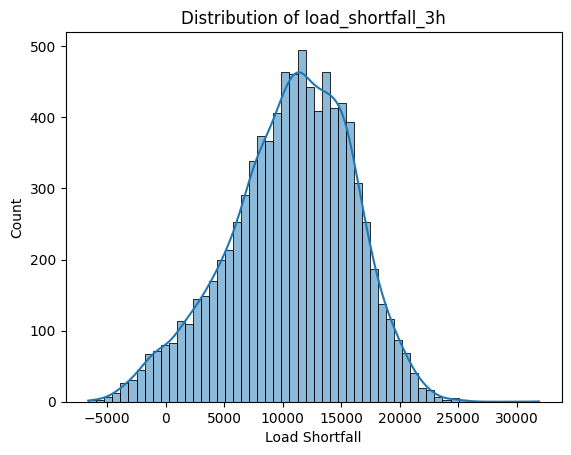

In [28]:
# have a look at feature distributions
sns.histplot(df['load_shortfall_3h'], kde=True)
plt.xlabel('Load Shortfall')
plt.ylabel('Count')
plt.title('Distribution of load_shortfall_3h')
plt.show()

In [31]:
sns.histplot(df['barcelona_pressure'], kde=True)
plt.xlabel('Barcelona Pressure')
plt.ylabel('Count')
plt.title('Distribution of Barcelona Pressure')
plt.show()

<a id="five"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="six"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="seven"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic